In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SPX_trial.csv')
df.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,...,VIX High,VIX Low,VIX Close,VIX Adj Close,SPX Open,SPX High,SPX Low,SPX close,SPX ADj Close,Volume
0,2010-01-08,0.4100,0.3300,0.2600,1.0,0.423275,0.1500,0.384907,0.488293,0.281522,...,19.459999,16.860001,17.629999,17.629999,1116.560059,1145.390015,1116.560059,1144.979980,1144.979980,21115350000
1,2010-01-15,0.4744,0.2564,0.2692,1.0,0.429163,0.2052,0.384907,0.488293,0.281522,...,22.299999,17.330000,22.270000,22.270000,1145.959961,1150.410034,1131.390015,1136.030029,1136.030029,21816230000
2,2010-01-22,0.4000,0.2526,0.3474,1.0,0.427088,0.0526,0.384907,0.488293,0.281522,...,28.010000,22.270000,23.730000,23.730000,1136.030029,1150.449951,1090.180054,1091.760010,1091.760010,22618330000
3,2010-01-29,0.3500,0.2833,0.3667,1.0,0.418863,-0.0167,0.384907,0.488293,0.281522,...,26.320000,21.080000,26.080000,26.080000,1092.400024,1103.689941,1071.589966,1073.869995,1073.869995,25397670000
4,2010-02-05,0.2923,0.2769,0.4308,1.0,0.402050,-0.1385,0.384907,0.488293,0.281522,...,29.219999,23.870001,23.959999,23.959999,1073.890015,1104.729980,1044.500000,1066.189941,1066.189941,25411190000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 21 columns):
Date                         458 non-null object
Bullish                      458 non-null float64
Neutral                      458 non-null float64
Bearish                      458 non-null float64
Total                        458 non-null float64
Bullish 8-Week Mov Avg       458 non-null float64
Bull-Bear Spread             458 non-null float64
Bullish Average              458 non-null float64
Bullish Average + St. Dev    458 non-null float64
Bullish Average - St. Dev    458 non-null float64
VIX Open                     458 non-null float64
VIX High                     458 non-null float64
VIX Low                      458 non-null float64
VIX Close                    458 non-null float64
VIX Adj Close                458 non-null float64
SPX Open                     458 non-null float64
SPX High                     458 non-null float64
SPX Low                      458 non-null floa

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# need to set date as the index in order to take advantage of Pandas Features
df.set_index('Date', inplace = True )
df.head()

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,VIX Open,VIX High,VIX Low,VIX Close,VIX Adj Close,SPX Open,SPX High,SPX Low,SPX close,SPX ADj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,
2010-01-08,0.4100,0.3300,0.2600,1.0,0.423275,0.1500,0.384907,0.488293,0.281522,19.270000,19.459999,16.860001,17.629999,17.629999,1116.560059,1145.390015,1116.560059,1144.979980,1144.979980,21115350000
2010-01-15,0.4744,0.2564,0.2692,1.0,0.429163,0.2052,0.384907,0.488293,0.281522,17.629999,22.299999,17.330000,22.270000,22.270000,1145.959961,1150.410034,1131.390015,1136.030029,1136.030029,21816230000
2010-01-22,0.4000,0.2526,0.3474,1.0,0.427088,0.0526,0.384907,0.488293,0.281522,22.270000,28.010000,22.270000,23.730000,23.730000,1136.030029,1150.449951,1090.180054,1091.760010,1091.760010,22618330000
2010-01-29,0.3500,0.2833,0.3667,1.0,0.418863,-0.0167,0.384907,0.488293,0.281522,23.730000,26.320000,21.080000,26.080000,26.080000,1092.400024,1103.689941,1071.589966,1073.869995,1073.869995,25397670000
2010-02-05,0.2923,0.2769,0.4308,1.0,0.402050,-0.1385,0.384907,0.488293,0.281522,25.690001,29.219999,23.870001,23.959999,23.959999,1073.890015,1104.729980,1044.500000,1066.189941,1066.189941,25411190000


In [6]:
df['5 EMA'] = df['SPX close'].ewm(span=5).mean()

In [7]:
df['Gain'] = df['SPX close'].diff().fillna(0)

In [8]:
df['% Change'] = (df['Gain']/df['SPX close'].shift(1)).fillna(0)

In [9]:
df['% Change'] = df['% Change']*100

In [10]:
df['Week']= (df['% Change']).shift(1).fillna(0)

In [11]:
df['Up']= np.where(df['Gain']>0, 1, 0)

In [12]:
df['Next_week']= np.where(df['Week']>0, 1, 0)

In [13]:
df['VIX+']= np.where(df['VIX High']>=25, 1, 0)

In [14]:
df['Bearish+']=np.where(df['Bearish']>=0.40, 1, 0)

In [226]:
#df.drop(['Bullish+'], axis=1, inplace=True)

In [15]:
df.head(10)

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,VIX Open,...,SPX ADj Close,Volume,5 EMA,Gain,% Change,Week,Up,Next_week,VIX+,Bearish+
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-08,0.4100,0.3300,0.2600,1.0000,0.423275,0.1500,0.384907,0.488293,0.281522,19.270000,...,1144.979980,21115350000,1144.979980,0.000000,0.000000,0.000000,0,0,0,0
2010-01-15,0.4744,0.2564,0.2692,1.0000,0.429163,0.2052,0.384907,0.488293,0.281522,17.629999,...,1136.030029,21816230000,1139.610009,-8.949951,-0.781669,0.000000,0,0,0,0
2010-01-22,0.4000,0.2526,0.3474,1.0000,0.427088,0.0526,0.384907,0.488293,0.281522,22.270000,...,1091.760010,22618330000,1116.944220,-44.270019,-3.896906,-0.781669,0,0,1,0
2010-01-29,0.3500,0.2833,0.3667,1.0000,0.418863,-0.0167,0.384907,0.488293,0.281522,23.730000,...,1073.869995,25397670000,1099.051850,-17.890015,-1.638640,-3.896906,0,0,1,0
2010-02-05,0.2923,0.2769,0.4308,1.0000,0.402050,-0.1385,0.384907,0.488293,0.281522,25.690001,...,1066.189941,25411190000,1086.436615,-7.680054,-0.715175,-1.638640,0,0,1,1
2010-02-12,0.3675,0.2137,0.4188,1.0000,0.395350,-0.0513,0.384907,0.488293,0.281522,23.959999,...,1075.510010,22017080000,1082.443885,9.320069,0.874147,-0.715175,1,0,1,1
2010-02-19,0.3585,0.2893,0.3522,1.0000,0.393062,0.0063,0.384907,0.488293,0.281522,21.070000,...,1109.170044,16162900000,1091.906425,33.660034,3.129681,0.874147,1,1,0,0
2010-02-26,0.3489,0.3557,0.2953,0.9999,0.375200,0.0536,0.384907,0.488293,0.281522,19.879999,...,1104.489990,20970170000,1096.271256,-4.680054,-0.421942,3.129681,0,1,0,0
2010-03-05,0.3586,0.3793,0.2621,1.0000,0.368775,0.0965,0.384907,0.488293,0.281522,18.059999,...,1138.699951,20011650000,1110.791869,34.209961,3.097354,-0.421942,1,0,0,0


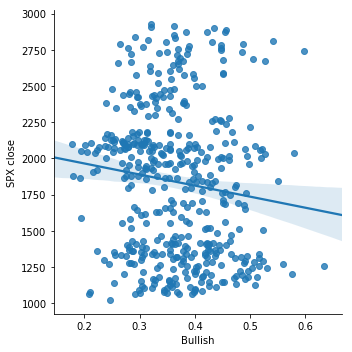

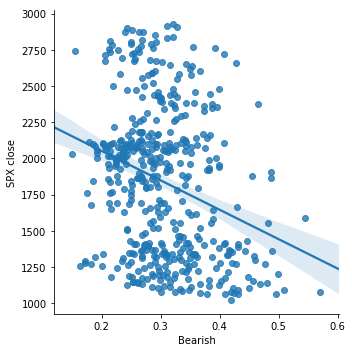

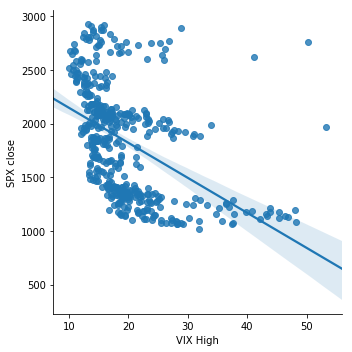

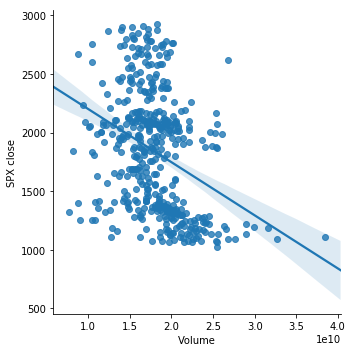

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot(x='Bullish', y='SPX close', data=df)
plt.show()
sns.lmplot(x='Bearish', y='SPX close', data=df)
plt.show()
sns.lmplot(x='VIX High', y='SPX close', data=df)
plt.show()
sns.lmplot(x='Volume', y='SPX close', data=df)
plt.show()

In [17]:
# The majority of the large percentage moves occured in 2011 when the Index had a lower base
df.sort_values('% Change', ascending = False)[['% Change']].head(10)

,% Change
Date,
2011-12-02,7.388642
2011-10-14,5.982033
2011-07-01,5.614734
2010-07-09,5.415708
2011-09-16,5.352489
2011-08-26,4.741308
2013-01-04,4.566354
2018-02-16,4.301117
2014-10-24,4.124528


In [18]:
df.sort_values('% Change', ascending = True)[['% Change']].head(10)

,% Change
Date,
2011-08-05,-7.188846
2011-09-23,-6.544350
2010-05-07,-6.388352
2016-01-08,-5.964457
2018-03-23,-5.950196
2015-08-21,-5.768478
2018-02-09,-5.161953
2010-07-02,-5.031761
2011-08-19,-4.689477


In [19]:
df.sort_values('Bullish', ascending=False)[['Bullish', 'VIX High', '% Change', 'Week']].head(25)


,Bullish,VIX High,% Change,Week
Date,,,,
2010-12-24,0.632800,18.320000,1.033836,0.282974
2018-01-05,0.597531,10.850000,2.600970,-0.362607
2014-11-14,0.579310,15.740000,0.388790,0.687297
2010-11-12,0.575600,23.070000,-2.173187,3.599375
2011-01-07,0.558800,18.629999,1.102063,0.069225
2013-12-27,0.550562,14.590000,1.269308,2.422099
2018-01-19,0.541133,12.330000,0.863531,1.570825
2010-12-10,0.530500,18.270000,1.281125,2.968718
2014-11-07,0.526882,14.310000,0.687297,2.721706


In [20]:
df.sort_values('Bearish', ascending=False)[['Bearish', 'VIX High', '% Change', 'Week']].head(24)

,Bearish,VIX High,% Change,Week
Date,,,,
2010-07-09,0.570700,27.240000,5.415708,-5.031761
2013-04-12,0.544828,18.200001,2.289989,-1.013893
2010-05-28,0.508800,35.680000,0.158142,-4.225672
2011-08-05,0.498500,48.000000,-7.188846,-3.921131
2010-08-27,0.494700,28.110001,-0.662503,-0.700492
2012-11-16,0.488235,18.500000,-1.447257,-2.428933
2016-01-22,0.487055,27.219999,1.413053,-2.169585
2016-02-12,0.486974,27.570000,-0.812213,-3.102191
2013-04-19,0.482192,16.980000,-2.114736,2.289989


In [21]:
df.sort_values('VIX High', ascending=False)[['VIX High', 'Gain', '% Change', 'Bearish']].head(40)

,VIX High,Gain,% Change,Bearish
Date,,,,
2015-08-21,53.290001,-120.650024,-5.768478,0.333333
2018-02-02,50.299999,-110.740234,-3.854690,0.287582
2010-05-21,48.200001,-47.990113,-4.225672,0.337000
2011-08-05,48.000000,-92.900024,-7.188846,0.498500
2011-09-30,46.880001,-5.010010,-0.440855,0.467900
2010-05-14,46.369999,24.800049,2.232469,0.366000
2011-08-19,45.400002,-55.280030,-4.689477,0.398200
2011-08-12,45.279999,-20.569946,-1.715048,0.447800
2011-09-16,43.869999,61.780030,5.352489,0.413500


From my observations can already see that there is a strong correlation between the VIX being High and the market dropping. 

I will start with a basic linear regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/Users/marcbirbach/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
X = df[['Bullish','VIX High']].values
y = df['SPX close'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size =0.25, random_state =42)

In [26]:
scores = cross_val_score(model, X_train, y_train)
print(scores)
print(scores.mean())

[0.21763703 0.22679159 0.08551797]
0.17664886055924076


Clearly my simple model fails and I will need to strengthen my model. I will change this into a classification problem where I am trying to predict if the market will be up or down in a given week.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [28]:
X = df[['Bearish+','VIX+']].values
y = df['Next_week'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size =0.25, random_state =42)

In [29]:
logreg_class = LogisticRegression()
logreg_class.fit(X_train, y_train)

knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

cart_class = DecisionTreeClassifier()
cart_class.fit(X_train, y_train)

bagged_class = BaggingClassifier()
bagged_class.fit(X_train, y_train)

random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train, y_train)

adaboost_class = AdaBoostClassifier()
adaboost_class.fit(X_train, y_train)

support_vector_class = SVC()
support_vector_class.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn.metrics import f1_score

In [31]:
def f1_scorer(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train))
    f1_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test))
    
    print("The training F1-score for " + str(model) + " is: " + str(f1_train))
    print("The testing F1-score for " + str(model) + " is: " + str(f1_test))
    return (f1_train, f1_test)

In [32]:
print(f1_scorer(logreg_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(knn_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(cart_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(bagged_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(random_forest_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(adaboost_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(support_vector_class, X_train, X_test, y_train, y_test))

The training F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is: 0.7861271676300579
The testing F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is: 0.7239263803680982
(0.7861271676300579, 0.7239263803680982)

The training F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') is: 0.18320610687022898
The testing F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_p

In [33]:
scores_loreg = cross_val_score(logreg_class, X_train, y_train)
print(scores_loreg)
print(scores_loreg.mean())

[0.68695652 0.64035088 0.70175439]
0.6763539282990084


In [34]:
logreg_class.coef_

array([[-1.77778455, -0.19375418]])

In [35]:
scores_knn = cross_val_score(knn_class, X_train, y_train)
print(scores_knn)
print(scores_knn.mean())

[0.43478261 0.39473684 0.63157895]
0.4870327993897788


In [36]:
scores_cart = cross_val_score(cart_class, X_train, y_train)
print(scores_cart)
print(scores.mean())

[0.68695652 0.64035088 0.70175439]
0.17664886055924076


In [37]:
scores_bagged = cross_val_score(bagged_class, X_train, y_train)
print(scores_bagged)
print(scores_bagged.mean())

[0.68695652 0.64035088 0.70175439]
0.6763539282990084


In [38]:
scores_rf = cross_val_score(random_forest_class, X_train, y_train)
print(scores_rf)
print(scores_rf.mean())

[0.68695652 0.64035088 0.70175439]
0.6763539282990084


In [39]:
scores_ad = cross_val_score(adaboost_class, X_train, y_train)
print(scores_ad)
print(scores_ad.mean())

[0.68695652 0.64035088 0.70175439]
0.6763539282990084


In [40]:
scores_sv = cross_val_score(support_vector_class, X_train, y_train)
print(scores_sv)
print(scores_sv.mean())

[0.68695652 0.64035088 0.70175439]
0.6763539282990084


In [41]:
pred_rf = cross_val_predict(random_forest_class, X, y)
pred_rf

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
pred_lr = cross_val_predict(logreg_class, X, y)
pred_lr

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Now will use both the Random Forest and Logistic Regression results to perform a backtest

In [44]:
new_df=df[['SPX close', 'Gain', '% Change']]

In [45]:
new_df['Next_Week_Gain']= (new_df['Gain']).shift(1).fillna(0)

In [46]:
new_df['Next_Week_%']= (new_df['% Change']).shift(1).fillna(0)

In [47]:
new_df['Random_Forest']=pred_rf

In [48]:
new_df['Logistic_Regression']=pred_lr

In [50]:
new_df.drop(pd.to_datetime('2010-01-08'),inplace=True)
new_df.head()

,SPX close,Gain,% Change,Next_Week_Gain,Next_Week_%,Random_Forest,Logistic_Regression
Date,,,,,,,
2010-01-15,1136.030029,-8.949951,-0.781669,0.000000,0.000000,1,1
2010-01-22,1091.760010,-44.270019,-3.896906,-8.949951,-0.781669,1,0
2010-01-29,1073.869995,-17.890015,-1.638640,-44.270019,-3.896906,1,0
2010-02-05,1066.189941,-7.680054,-0.715175,-17.890015,-1.638640,0,0
2010-02-12,1075.510010,9.320069,0.874147,-7.680054,-0.715175,0,0


In [51]:
new_df.drop(pd.to_datetime('2010-01-15'),inplace=True)
new_df.head()

,SPX close,Gain,% Change,Next_Week_Gain,Next_Week_%,Random_Forest,Logistic_Regression
Date,,,,,,,
2010-01-22,1091.760010,-44.270019,-3.896906,-8.949951,-0.781669,1,0
2010-01-29,1073.869995,-17.890015,-1.638640,-44.270019,-3.896906,1,0
2010-02-05,1066.189941,-7.680054,-0.715175,-17.890015,-1.638640,0,0
2010-02-12,1075.510010,9.320069,0.874147,-7.680054,-0.715175,0,0
2010-02-19,1109.170044,33.660034,3.129681,9.320069,0.874147,1,1


In [ ]:
new_df['RF_Trades']=new_df['Next_Week%'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
new_df['Amt Invested'] = [lambda x: 10 for x in new_df['Random_Forest'] if x == 1]

In [59]:
new_df['RF']=new_df['Next_Week%'] ['Random_Forest'] ==0 else 0

In [57]:
new_df.head()

,SPX close,Gain,% Change,Next_Week_Gain,Next_Week_%,Random_Forest,Logistic_Regression,RF
Date,,,,,,,,
2010-01-22,1091.760010,-44.270019,-3.896906,-8.949951,-0.781669,1,0,0
2010-01-29,1073.869995,-17.890015,-1.638640,-44.270019,-3.896906,1,0,0
2010-02-05,1066.189941,-7.680054,-0.715175,-17.890015,-1.638640,0,0,0
2010-02-12,1075.510010,9.320069,0.874147,-7.680054,-0.715175,0,0,0
2010-02-19,1109.170044,33.660034,3.129681,9.320069,0.874147,1,1,0


In [63]:
new_df['RF']=new_df[new_df['Random_Forest']==1]['Next_Week_%']

In [66]:
new_df['LR']=new_df[new_df['Logistic_Regression']==1]['Next_Week_%']

In [68]:
new_df.fillna(value=0, inplace=True)

In [ ]:
new_list= []
for i in range(len(new_df)):
    try:
        new_value=new_df.loc[i, 'Daily Gain'] / NVDA.loc[i+1, 'Adj Close']
        new_list.append(new_value)
    except:
        pass

In [ ]:
new_df['RF_sim']=10000

In [69]:
new_df.head()

,SPX close,Gain,% Change,Next_Week_Gain,Next_Week_%,Random_Forest,Logistic_Regression,RF,LR
Date,,,,,,,,,
2010-01-22,1091.760010,-44.270019,-3.896906,-8.949951,-0.781669,1,0,-0.781669,0.000000
2010-01-29,1073.869995,-17.890015,-1.638640,-44.270019,-3.896906,1,0,-3.896906,0.000000
2010-02-05,1066.189941,-7.680054,-0.715175,-17.890015,-1.638640,0,0,0.000000,0.000000
2010-02-12,1075.510010,9.320069,0.874147,-7.680054,-0.715175,0,0,0.000000,0.000000
2010-02-19,1109.170044,33.660034,3.129681,9.320069,0.874147,1,1,0.874147,0.874147


In [ ]:
df.plot(x='date', y='close_price', title="QQQ Price Chart")
plt.autumn()
